<a href="https://colab.research.google.com/github/rodrigoviannini/Hackathons/blob/main/super_soaker_20220830b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
5650+5650

11300

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.impute import SimpleImputer

##DATA VIEW


TABELA 1 | TRAIN

IREMOS SEPARAR OS DADOS DE TREINO EM TRAIN E TEST 

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UFRJ/machine_learning/dataset_treino_tratado_final.xlsx')
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10672.0,15859.0,17594.0,15193.00,15029.00,NaN,13034.0,14684.00,764.10,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12448.0,17947.0,17915.0,11755.00,14732.00,15425.00,14395.0,15631.00,682057.00,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12715.0,15607.0,NaN,13798.00,16711.00,18631.00,14094.0,17946.00,663376.00,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12471.0,16346.0,18377.0,10.02,15.25,15562.00,16154.0,17172.00,826282.00,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10337.0,17082.0,19932.0,12428.00,16182.00,12.76,13153.0,16412.00,579885.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293,26545,E,100.26,material_7,material_6,6,9,4,19,0,...,10476.0,14399.0,18824.0,12666.00,NaN,14601.00,14995.0,17.42,808354.00,1
11294,26546,E,103.60,material_7,material_6,6,9,1,15,3,...,12265.0,14193.0,19618.0,12.31,16.16,15.49,14522.0,17863.00,731105.00,1
11295,26553,E,121.42,material_7,material_6,6,9,1,9,6,...,11199.0,14626.0,19368.0,10795.00,14981.00,13.14,14845.0,15577.00,795.59,1
11296,26554,E,159.43,material_7,material_6,6,9,3,13,7,...,10795.0,17.6,20324.0,12.35,14607.00,15494.00,15472.0,14185.00,NaN,1


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/train.csv')
# df

In [ ]:
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10672.0,15859.0,17594.0,15193.00,15029.00,NaN,13034.0,14684.00,764.10,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12448.0,17947.0,17915.0,11755.00,14732.00,15425.00,14395.0,15631.00,682057.00,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12715.0,15607.0,NaN,13798.00,16711.00,18631.00,14094.0,17946.00,663376.00,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12471.0,16346.0,18377.0,10.02,15.25,15562.00,16154.0,17172.00,826282.00,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10337.0,17082.0,19932.0,12428.00,16182.00,12.76,13153.0,16412.00,579885.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293,26545,E,100.26,material_7,material_6,6,9,4,19,0,...,10476.0,14399.0,18824.0,12666.00,NaN,14601.00,14995.0,17.42,808354.00,1
11294,26546,E,103.60,material_7,material_6,6,9,1,15,3,...,12265.0,14193.0,19618.0,12.31,16.16,15.49,14522.0,17863.00,731105.00,1
11295,26553,E,121.42,material_7,material_6,6,9,1,9,6,...,11199.0,14626.0,19368.0,10795.00,14981.00,13.14,14845.0,15577.00,795.59,1
11296,26554,E,159.43,material_7,material_6,6,9,3,13,7,...,10795.0,17.6,20324.0,12.35,14607.00,15494.00,15472.0,14185.00,NaN,1


VERIFICANDO A PRESENÇA DAS FEATURES EM AMBOS OS DATASETS

In [ ]:
df.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

FEATURE PRESENTE APENAS NO DATASET DE TREINO

**0:**  FALHA


**1:**  NÃO FALHA

In [ ]:
df['failure'].value_counts()

0    5649
1    5649
Name: failure, dtype: int64

DIVISÃO DOS DADOS DE TRAIN | 70% 

In [ ]:
len(df)

11298

## O PROBLEMA...

Esses dados representam os resultados de um grande estudo de teste de produtos. Para cada um product_code, você recebe um número de produto attributes(fixado para o código), bem como um número de measurement valores para cada produto individual, representando vários métodos de teste de laboratório.

Cada produto é usado em um experimento simulado de ambiente do mundo real e absorve uma certa quantidade de fluido (loading) para ver se falha ou não.

Sua tarefa é usar os dados para prever falhas de novos códigos de produtos individuais com seus resultados de testes de laboratório individuais.

##CARACTERISTICAS DAS FEATURES

**product_code:**
PRODUTO


**attribute:**
NÚMERO DE PRODUTOS


**measurement:**
VALOR PARA CADA PRODUTO


**loading:**
PRODUTO TESTADO PARA ABSORVER UMA QTDE DE FLÚIDO PARA AVALIAR SE FALHA OU NÃO


**failure:**
FALHA [ 0 ] OU NÃO FALHA [ 1 ]

##PREPARAÇÃO DO DATASET DE TREINO

In [ ]:
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10672.0,15859.0,17594.0,15193.00,15029.00,NaN,13034.0,14684.00,764.10,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12448.0,17947.0,17915.0,11755.00,14732.00,15425.00,14395.0,15631.00,682057.00,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12715.0,15607.0,NaN,13798.00,16711.00,18631.00,14094.0,17946.00,663376.00,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12471.0,16346.0,18377.0,10.02,15.25,15562.00,16154.0,17172.00,826282.00,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10337.0,17082.0,19932.0,12428.00,16182.00,12.76,13153.0,16412.00,579885.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293,26545,E,100.26,material_7,material_6,6,9,4,19,0,...,10476.0,14399.0,18824.0,12666.00,NaN,14601.00,14995.0,17.42,808354.00,1
11294,26546,E,103.60,material_7,material_6,6,9,1,15,3,...,12265.0,14193.0,19618.0,12.31,16.16,15.49,14522.0,17863.00,731105.00,1
11295,26553,E,121.42,material_7,material_6,6,9,1,9,6,...,11199.0,14626.0,19368.0,10795.00,14981.00,13.14,14845.0,15577.00,795.59,1
11296,26554,E,159.43,material_7,material_6,6,9,3,13,7,...,10795.0,17.6,20324.0,12.35,14607.00,15494.00,15472.0,14185.00,NaN,1


##ESTUDAR A CORRELAÇÃO DAS FEATURES PARA DETERMINAR AS QUE SERÃO UTILIZADAS NO MODELO

In [ ]:
df['attribute_0'].value_counts()

material_7    8538
material_5    2760
Name: attribute_0, dtype: int64

In [ ]:
df['attribute_1'].value_counts()

material_8    6320
material_5    3872
material_6    1106
Name: attribute_1, dtype: int64

In [ ]:
df['attribute_2'].value_counts()

9    5100
8    2760
6    2218
5    1220
Name: attribute_2, dtype: int64

In [ ]:
df['attribute_3'].value_counts()

5    5100
8    3980
6    1112
9    1106
Name: attribute_3, dtype: int64

In [ ]:
df['measurement_0'].value_counts()

6     1084
7     1045
8     1011
5      969
9      893
4      819
10     808
11     732
3      623
12     594
13     454
2      446
14     389
15     286
1      268
16     237
17     152
18     137
0      130
19      83
20      52
21      36
22      18
24      18
23       7
25       5
26       2
Name: measurement_0, dtype: int64

In [ ]:
df['measurement_1'].value_counts()

5     1072
4     1029
6     1025
3      983
7      972
8      899
2      847
9      785
10     668
1      606
11     539
12     436
13     309
0      291
14     249
15     168
16     126
17      98
18      59
19      54
20      29
21      28
22      11
24       6
23       6
27       1
25       1
29       1
Name: measurement_1, dtype: int64

In [ ]:
df['measurement_2'].value_counts()

5     1400
6     1337
4     1327
7     1217
3     1072
8     1071
2      764
9      750
10     599
1      482
11     383
12     298
13     192
0      156
14      97
15      56
16      35
17      31
18      12
19       7
20       7
21       3
24       1
22       1
Name: measurement_2, dtype: int64

In [ ]:
df['measurement_3'].value_counts()

17638.0    11
17914.0    11
17435.0    11
17384.0    10
17472.0    10
           ..
17019.0     1
18813.0     1
19796.0     1
19057.0     1
15835.0     1
Name: measurement_3, Length: 3866, dtype: int64

## CONTINUANDO A CONSTRUÇÃO DO MODELO

VERIFICANDO A PRESENÇA DE DADOS NULOS

In [ ]:
df.isnull().sum()

id                  0
product_code        0
loading            88
attribute_0         0
attribute_1         0
attribute_2         0
attribute_3         0
measurement_0       0
measurement_1       0
measurement_2       0
measurement_3     139
measurement_4     231
measurement_5     318
measurement_6     357
measurement_7     389
measurement_8     447
measurement_9     536
measurement_10    556
measurement_11    632
measurement_12    694
measurement_13    737
measurement_14    771
measurement_15    839
measurement_16    882
measurement_17    943
failure             0
dtype: int64

VERIFICANDO A DIFERENÇA ENTRE MÉDIA E MEDIANA

In [ ]:
df.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,11298.000000,11210.000000,11298.000000,11298.000000,11298.000000,11298.000000,11298.000000,11159.000000,11067.000000,10980.000000,...,10762.000000,10742.000000,10666.000000,10604.000000,10561.000000,10527.000000,10459.000000,10416.000000,1.035500e+04,11298.000000
mean,8411.909187,131.027084,7.734820,6.546822,8.264560,6.845725,6.156045,15952.722019,10509.764185,15480.074847,...,10311.193247,14450.399466,17319.707647,10759.103675,14002.822060,14439.110154,13328.731634,14899.019578,6.372894e+05,0.500000
std,7401.146239,40.354675,1.462327,1.562929,4.369438,4.241097,3.273412,5511.637407,3685.110655,5155.856827,...,3514.216814,5067.161901,5964.294784,3811.741906,4961.000601,5065.503612,4701.254357,5117.727180,2.341021e+05,0.500022
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,14.690000,8.300000,13.810000,...,8.370000,11.080000,12.620000,7.400000,12.030000,9.140000,9.900000,12.030000,3.191800e+02,0.000000
25%,2824.250000,102.382500,6.000000,5.000000,5.000000,4.000000,4.000000,16824.500000,10719.000000,16186.000000,...,10468.250000,14915.000000,17705.250000,10569.000000,14532.000000,14719.000000,13296.000000,14846.000000,5.940125e+05,0.000000
50%,5648.500000,125.530000,8.000000,6.000000,8.000000,6.000000,6.000000,17641.000000,11578.000000,16998.000000,...,11288.000000,15964.000000,19061.000000,11777.000000,15482.000000,15833.000000,14556.000000,16182.000000,6.883430e+05,0.500000
75%,13181.750000,153.347500,9.000000,8.000000,11.000000,9.000000,8.000000,18387.000000,12318.500000,17719.000000,...,12016.000000,16822.000000,20201.250000,12796.250000,16296.000000,16960.000000,15714.500000,17514.250000,7.733460e+05,1.000000
max,26559.000000,385.860000,9.000000,9.000000,26.000000,29.000000,24.000000,21267.000000,16484.000000,21425.000000,...,15412.000000,22479.000000,25429.000000,17594.000000,22713.000000,21847.000000,21515.000000,24094.000000,1.181998e+06,1.000000


PREENCHENDO OS VALORS NANs USANDO "SAMPLEIMPUTER" DO SKLEARN

In [ ]:
most_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_imputer

SimpleImputer(strategy='median')

PREENCHENDO AS COLUNAS COM A MEDIANA

In [ ]:
df.loading = most_imputer.fit_transform(df[['loading']])
df.measurement_3 = most_imputer.fit_transform(df[['measurement_3']])
df.measurement_4 = most_imputer.fit_transform(df[['measurement_4']])
df.measurement_5 = most_imputer.fit_transform(df[['measurement_5']])
df.measurement_6 = most_imputer.fit_transform(df[['measurement_6']])
df.measurement_7 = most_imputer.fit_transform(df[['measurement_7']])
df.measurement_8 = most_imputer.fit_transform(df[['measurement_8']])
df.measurement_9 = most_imputer.fit_transform(df[['measurement_9']])
df.measurement_10 = most_imputer.fit_transform(df[['measurement_10']])
df.measurement_11 = most_imputer.fit_transform(df[['measurement_11']])
df.measurement_12 = most_imputer.fit_transform(df[['measurement_12']])
df.measurement_13 = most_imputer.fit_transform(df[['measurement_13']])
df.measurement_14 = most_imputer.fit_transform(df[['measurement_14']])
df.measurement_15 = most_imputer.fit_transform(df[['measurement_15']])
df.measurement_16 = most_imputer.fit_transform(df[['measurement_16']])
df.measurement_17 = most_imputer.fit_transform(df[['measurement_17']])

In [ ]:
# df.loading = most_imputer.fit_transform(df[['loading']])
# df.measurement_3 = most_imputer.fit_transform(df[['measurement_3']])
# df.measurement_4 = most_imputer.fit_transform(df[['measurement_4']])
# df.measurement_5 = most_imputer.fit_transform(df[['measurement_5']])
# df.measurement_6 = most_imputer.fit_transform(df[['measurement_6']])
# df.measurement_7 = most_imputer.fit_transform(df[['measurement_7']])
# df.measurement_8 = most_imputer.fit_transform(df[['measurement_8']])
# df.measurement_9 = most_imputer.fit_transform(df[['measurement_9']])
# df.measurement_10 = most_imputer.fit_transform(df[['measurement_10']])
# df.measurement_11 = most_imputer.fit_transform(df[['measurement_11']])
# df.measurement_12 = most_imputer.fit_transform(df[['measurement_12']])
# df.measurement_13 = most_imputer.fit_transform(df[['measurement_13']])
# df.measurement_14 = most_imputer.fit_transform(df[['measurement_14']])
# df.measurement_15 = most_imputer.fit_transform(df[['measurement_15']])
# df.measurement_16 = most_imputer.fit_transform(df[['measurement_16']])
# df.measurement_17 = most_imputer.fit_transform(df[['measurement_17']])

VERIFICANDO SE TODAS AS FEATURES COM DADOS NANs FORAM PREENCHIDAS COM A MEDIANA

In [ ]:
df.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

AVALIANDO OS PRODUTOS

QTDE DE VALORES POR PRODUTOS

In [ ]:
df['product_code'].value_counts()

A    5100
B    2760
C    1220
D    1112
E    1106
Name: product_code, dtype: int64

QTDE DE VALORES ÚNICOS

In [ ]:
df['product_code'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

VERIFICANDO A PRESENÇA DE OUTLIERS

In [ ]:
df.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


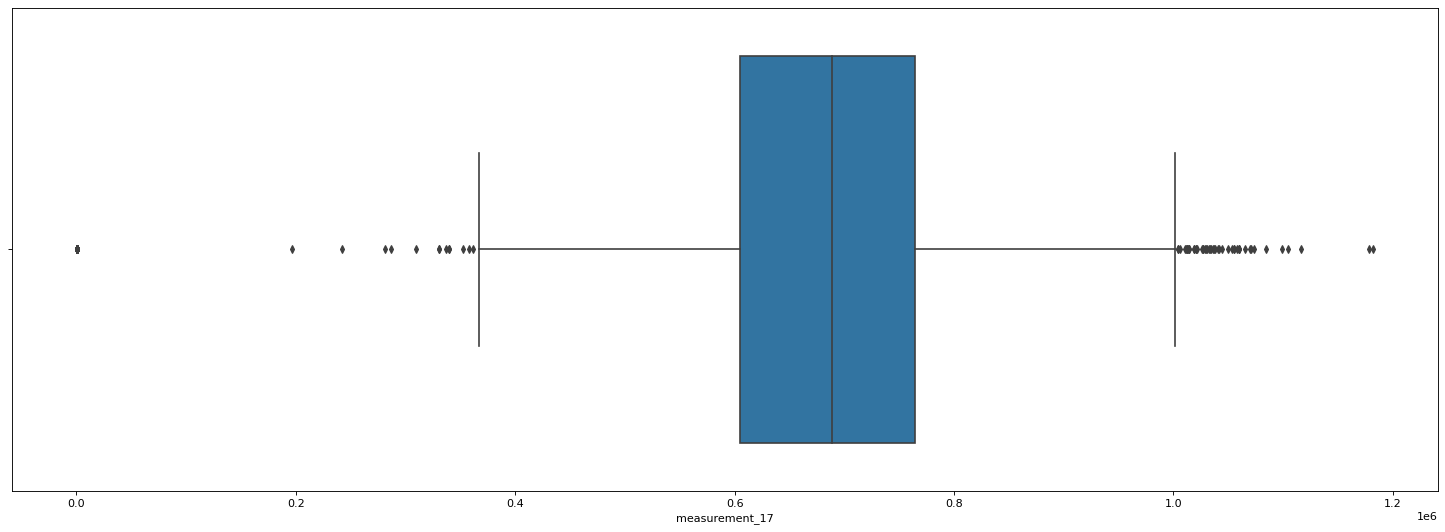

In [ ]:
plt.figure(figsize=(23, 8), dpi=80)
sns.boxplot(df['measurement_17'])
plt.show();

In [ ]:
# Position of the Outlier
print(np.where((df['measurement_0']))) #& (df['measurement_1']>600)))


(array([    0,     1,     2, ..., 11295, 11296, 11297]),)


In [ ]:
# # Scatter plot
# fig, ax = plt.subplots(figsize = (18,10))
# ax.scatter(df['measurement_3'], df['measurement_5'])

# # x-axis label
# ax.set_xlabel('(PROPORCAO')

# # y-axis label
# ax.set_ylabel('TAXA')
# plt.show()


In [ ]:
#loading
#measurement_0
#measurement_1
#measurement_2

#TALVEZ: measurement_4 measurement_8 measurement_13

In [ ]:
df = df.drop(columns='measurement_0')
df = df.drop(columns='measurement_1')
df = df.drop(columns='measurement_2')


# df = df.drop(columns='measurement_4')
# df = df.drop(columns='measurement_5')
# df = df.drop(columns='measurement_6')
# df = df.drop(columns='measurement_8')
# df = df.drop(columns='measurement_9')
# df = df.drop(columns='measurement_10')
# df = df.drop(columns='measurement_12')
# df = df.drop(columns='measurement_13')
# df = df.drop(columns='measurement_14')
# df = df.drop(columns='measurement_15')
# df = df.drop(columns='measurement_16')
# df = df.drop(columns='measurement_17')

In [ ]:
df = df.drop(columns='measurement_3')
df = df.drop(columns='measurement_7')
df = df.drop(columns='measurement_11')

In [ ]:
df.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
       'measurement_16', 'measurement_17', 'failure'],
      dtype='object')

In [ ]:
# plt.figure(figsize=(23, 8), dpi=80)
# sns.boxplot(df['measurement_17'])
# plt.show();

MÉTODO DO DESVIO PADRÃO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11298 entries, 0 to 11297
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11298 non-null  int64  
 1   product_code    11298 non-null  object 
 2   loading         11298 non-null  float64
 3   attribute_0     11298 non-null  object 
 4   attribute_1     11298 non-null  object 
 5   attribute_2     11298 non-null  int64  
 6   attribute_3     11298 non-null  int64  
 7   measurement_4   11298 non-null  float64
 8   measurement_5   11298 non-null  float64
 9   measurement_6   11298 non-null  float64
 10  measurement_8   11298 non-null  float64
 11  measurement_9   11298 non-null  float64
 12  measurement_10  11298 non-null  float64
 13  measurement_12  11298 non-null  float64
 14  measurement_13  11298 non-null  float64
 15  measurement_14  11298 non-null  float64
 16  measurement_15  11298 non-null  float64
 17  measurement_16  11298 non-null 

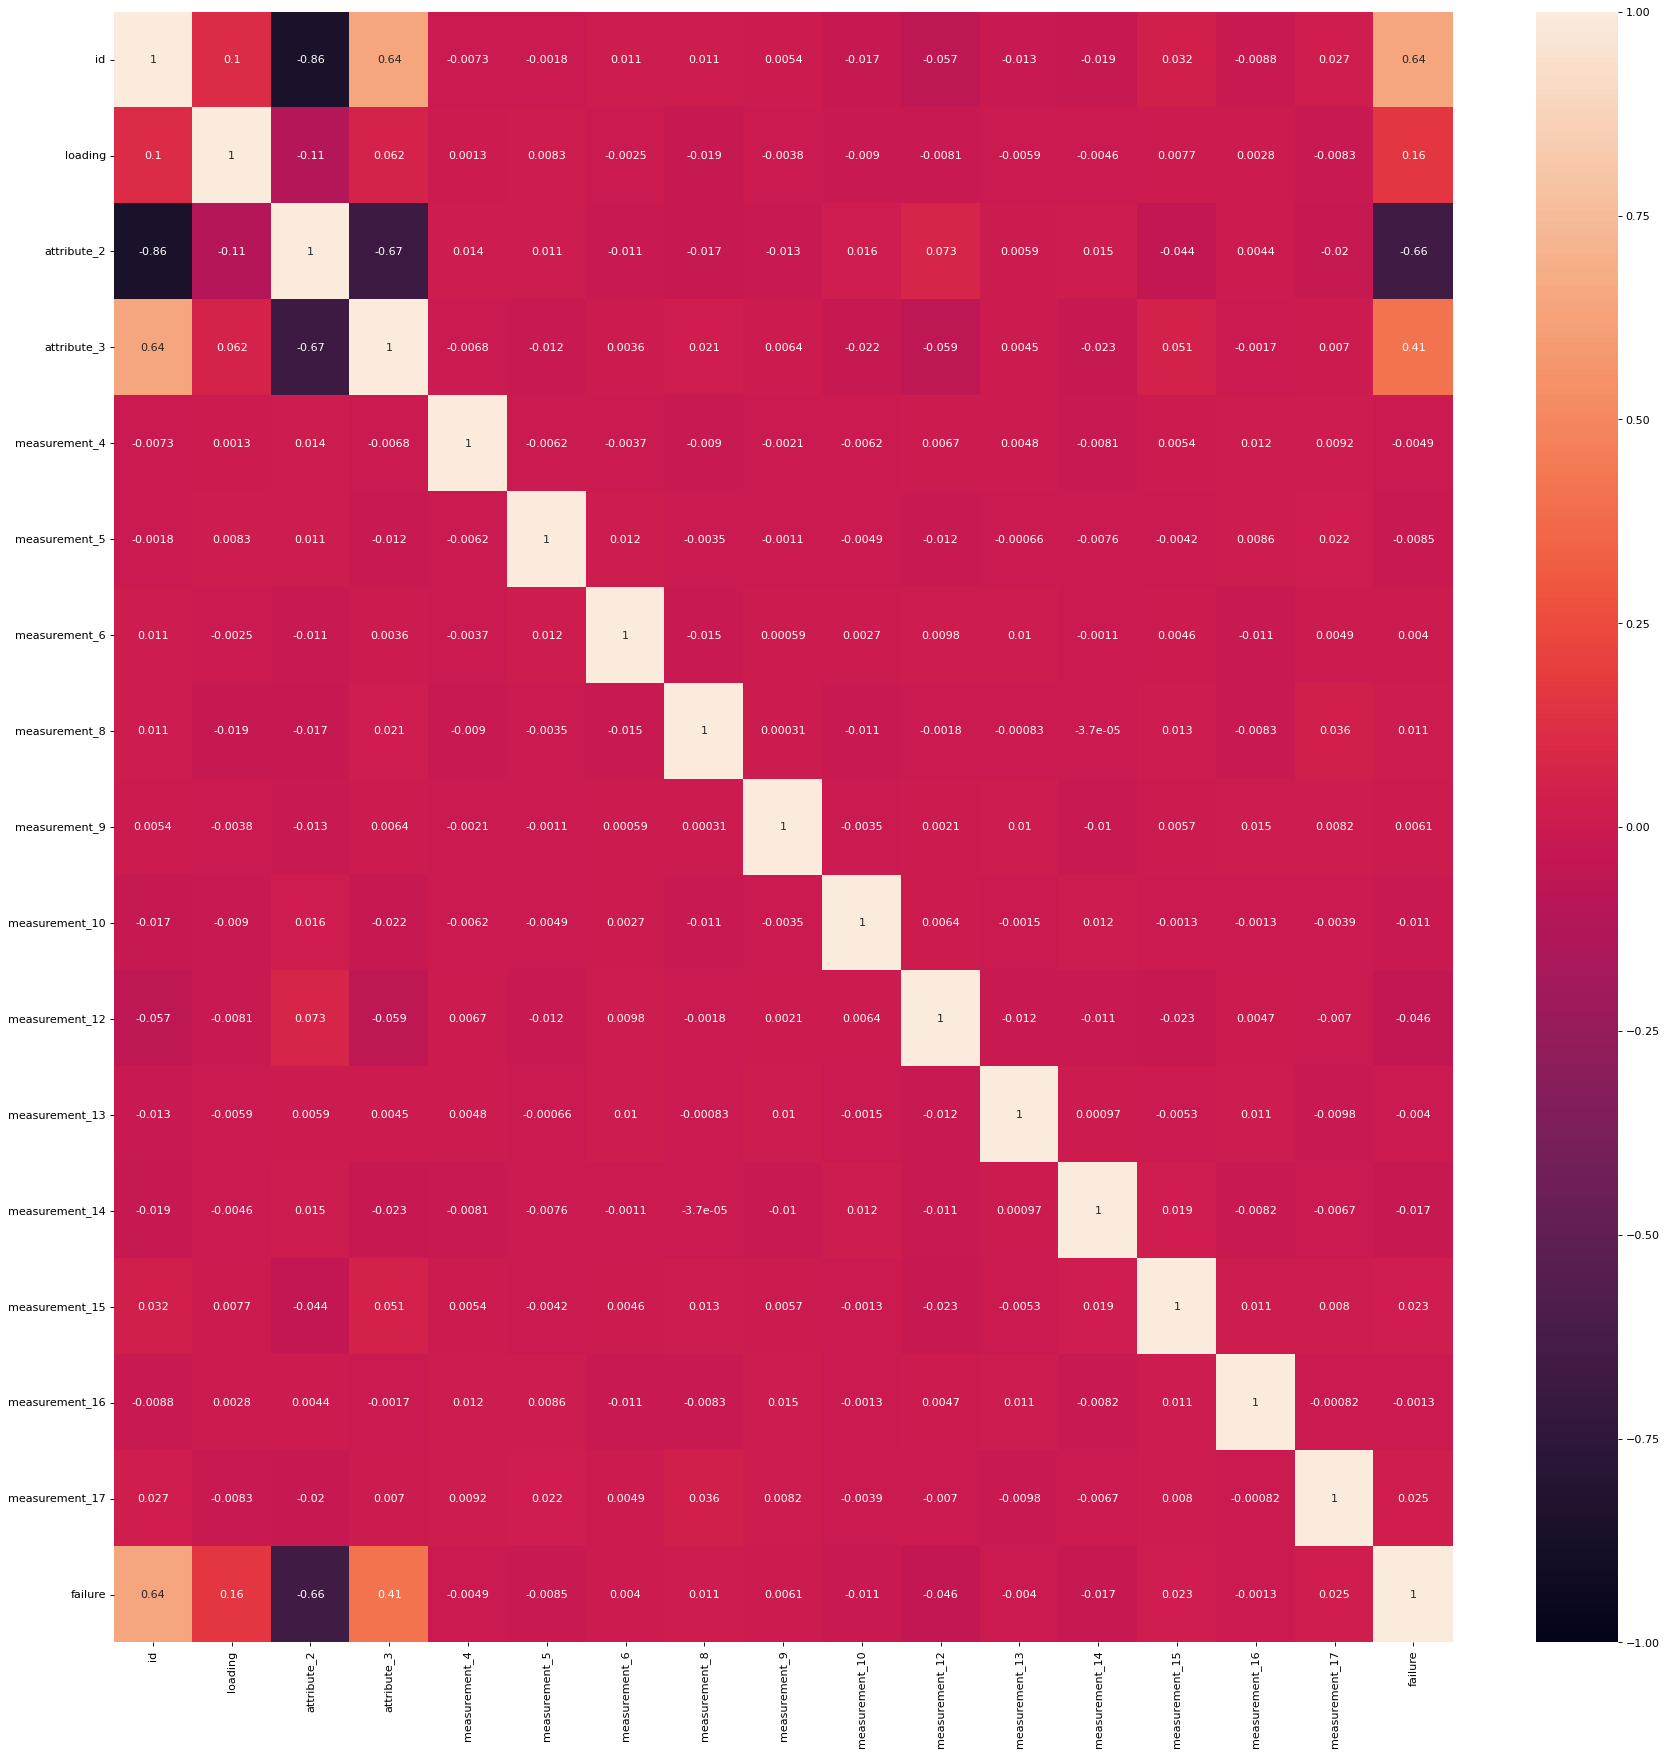

In [ ]:
plt.figure(figsize=(27, 27), dpi=80)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

## PREPARAÇÃO PARA O MODELO DE MACHINE LEARNING

DROPANDO A COLUNA 'ID'

In [ ]:
# df = df.drop(columns='id')

In [ ]:
df = df.drop(columns='product_code')
df = df.drop(columns='attribute_0')
df = df.drop(columns='attribute_1')

TRANSFORMANDO VALORES STRINGS DA COLUINA ['PRODUCT_CODE'] EM VALORES NUMÉRICOS

In [ ]:
# df['product_code'].value_counts()

In [ ]:
df = df.replace(to_replace = 'A', value = 0)
df = df.replace(to_replace = 'B', value = 1)
df = df.replace(to_replace = 'C', value = 2)
df = df.replace(to_replace = 'D', value = 3)
df = df.replace(to_replace = 'E', value = 4)


TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_0'] EM VALORES NUMÉRICOS

In [ ]:
# df['attribute_0'].value_counts()

In [ ]:
df = df.replace(to_replace = 'material_5', value = 5)
df = df.replace(to_replace = 'material_7', value = 7)

TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_1'] EM VALORES NUMÉRICOS

In [ ]:
# :df['attribute_1'].value_counts()

In [ ]:
df = df.replace(to_replace = 'material_6', value = 6)
df = df.replace(to_replace = 'material_8', value = 8)

In [ ]:
# df.head()

##TESTES

SELECT TYPES

In [ ]:
df.select_dtypes(include=np.number).columns[:-1]

Index(['id', 'loading', 'attribute_2', 'attribute_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

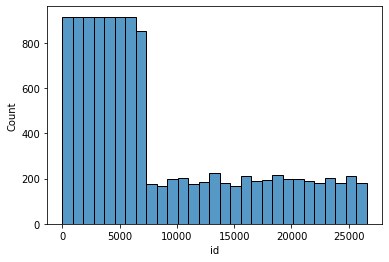

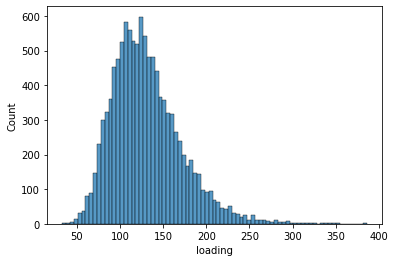

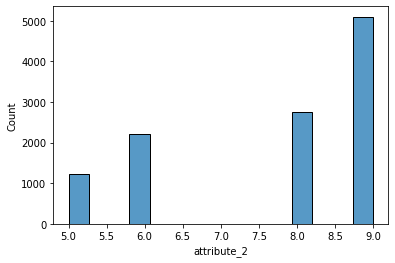

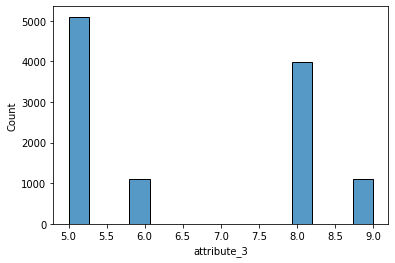

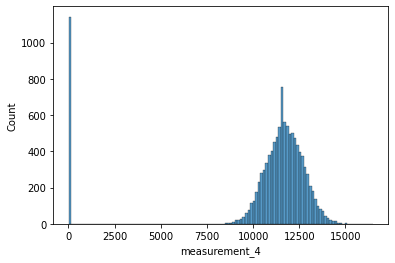

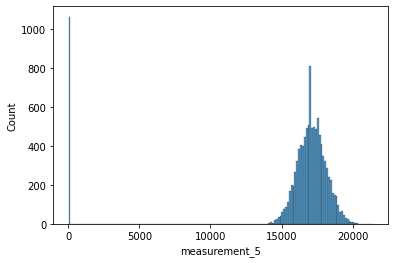

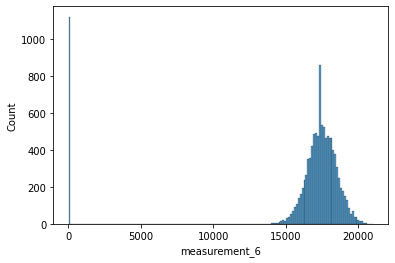

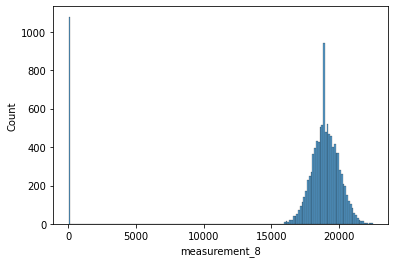

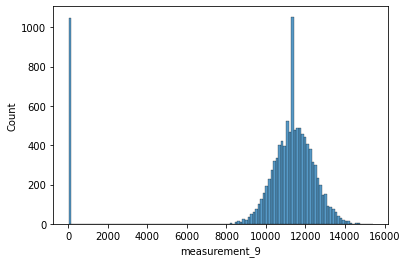

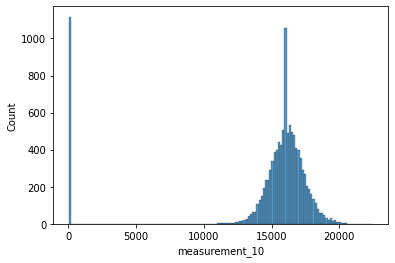

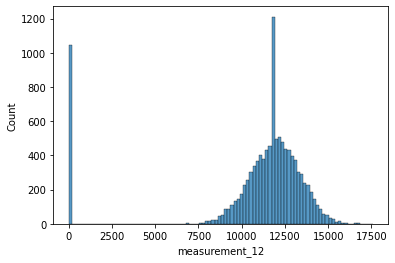

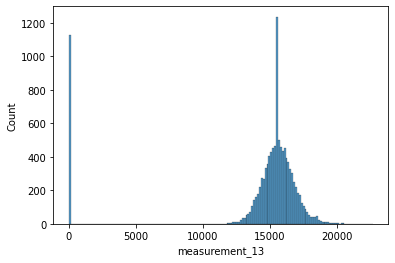

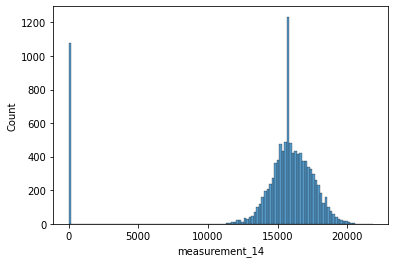

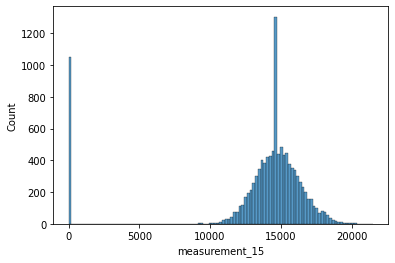

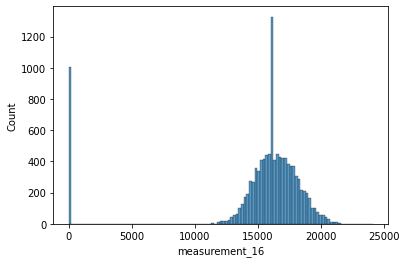

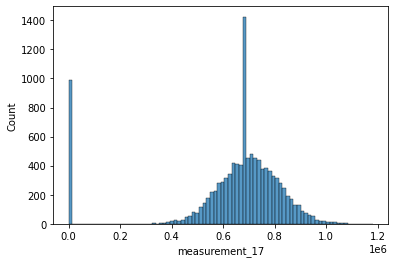

In [ ]:
for col in df.select_dtypes(include=np.number).columns[:-1]:
    
    sns.histplot(data=df, x=col)
    
    plt.show()

FAILURE

In [ ]:
df["failure"].value_counts()

0    5649
1    5649
Name: failure, dtype: int64

In [ ]:
df["failure"].value_counts(normalize=True)

0    0.5
1    0.5
Name: failure, dtype: float64

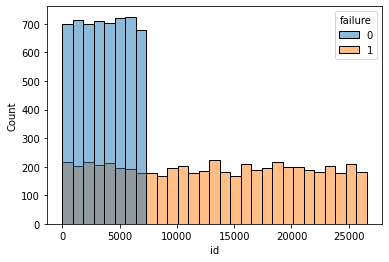

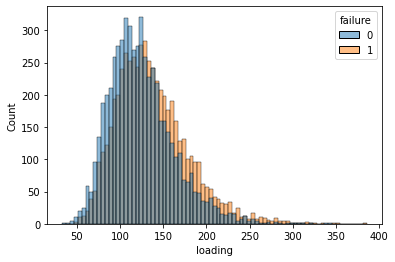

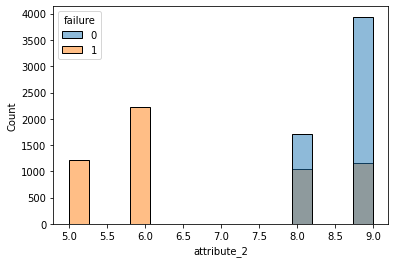

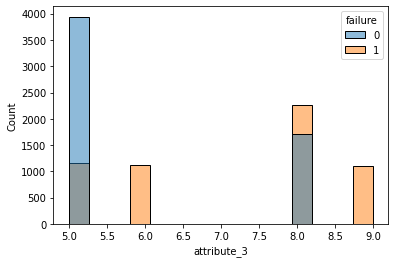

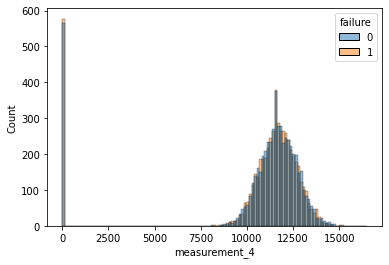

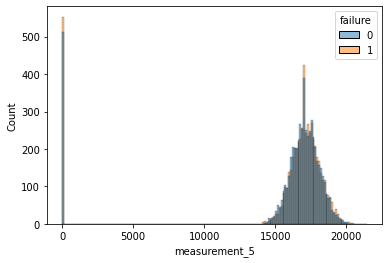

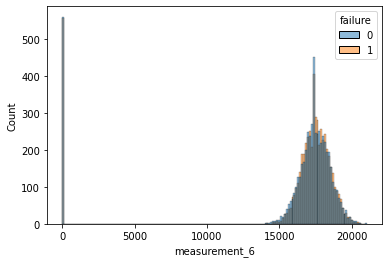

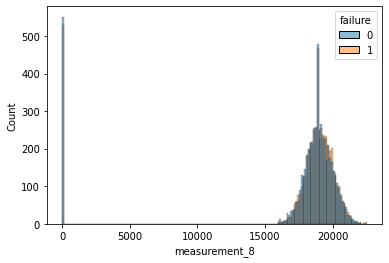

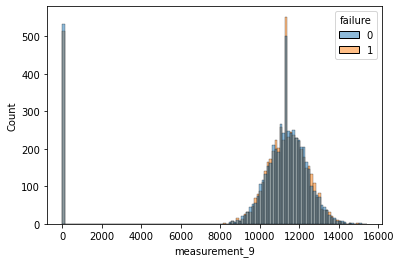

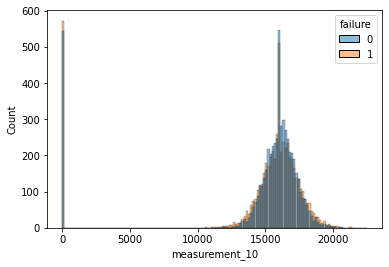

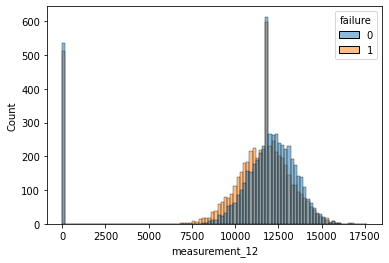

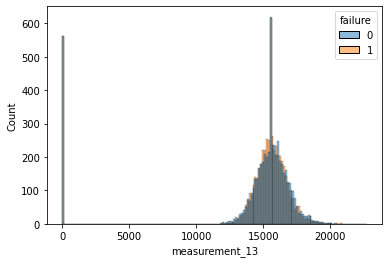

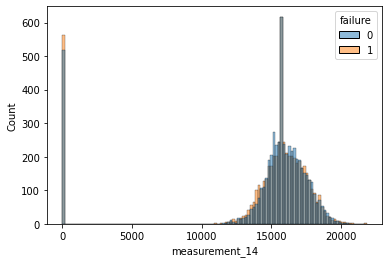

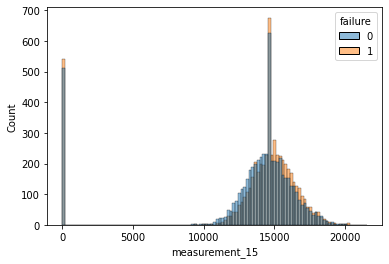

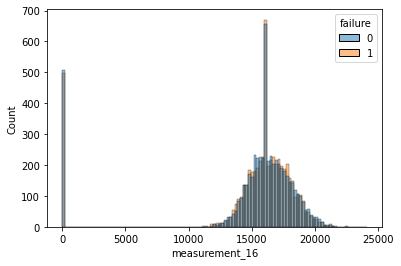

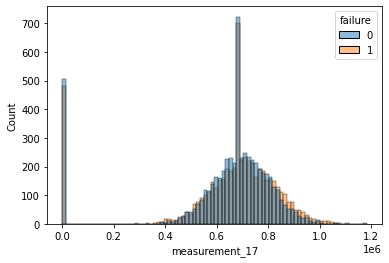

In [ ]:
for col in df.select_dtypes(include=np.number).columns[:-1]:
    
    sns.histplot(data=df, x=col, hue="failure")
    
    plt.show()

##CONSTRUINDO O MODELO

In [ ]:
df_model = df.select_dtypes(include=np.number)

In [ ]:
df_model.isnull().sum()

id                0
loading           0
attribute_2       0
attribute_3       0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [ ]:
df_model

,id,loading,attribute_2,attribute_3,measurement_4,measurement_5,measurement_6,measurement_8,measurement_9,measurement_10,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,80.10,9,5,12518.00,15748.00,19292.00,20155.00,10672.0,15859.0,15193.00,15029.00,15833.00,13034.0,14684.00,764.10,0
1,1,84.89,9,5,11.54,17717.00,17893.00,17889.00,12448.0,17947.0,11755.00,14732.00,15425.00,14395.0,15631.00,682057.00,0
2,2,82.43,9,5,11652.00,16738.00,18.24,18288.00,12715.0,15607.0,13798.00,16711.00,18631.00,14094.0,17946.00,663376.00,0
3,3,101.07,9,5,11188.00,18576.00,18339.00,19.06,12471.0,16346.0,10.02,15.25,15562.00,16154.0,17172.00,826282.00,0
4,4,188.06,9,5,12.95,16.99,15746.00,18093.00,10337.0,17082.0,12428.00,16182.00,12.76,13153.0,16412.00,579885.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11293,26545,100.26,6,9,10381.00,17773.00,18459.00,18889.00,10476.0,14399.0,12666.00,15482.00,14601.00,14995.0,17.42,808354.00,1
11294,26546,103.60,6,9,12629.00,16.46,17414.00,19199.00,12265.0,14193.0,12.31,16.16,15.49,14522.0,17863.00,731105.00,1
11295,26553,121.42,6,9,10698.00,17157.00,19184.00,19405.00,11199.0,14626.0,10795.00,14981.00,13.14,14845.0,15577.00,795.59,1
11296,26554,159.43,6,9,12.33,17263.00,17379.00,18075.00,10795.0,17.6,12.35,14607.00,15494.00,15472.0,14185.00,688343.00,1


##IMPORTANDO AS BIBLIOTECAS DE MACHINE LEARNING

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEPARANDO OS DADOS EM TRAIN E TEST

In [ ]:
X = df.drop(columns='failure')
y = df['failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

PADRONIZE RECURSOS REMOVENDO A MÉDIA E DIMENSIONANDO PARA A VARIAÇÃO DA UNIDADE.

In [ ]:
ss = StandardScaler().fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_train_ss

,id,loading,attribute_2,attribute_3,measurement_4,measurement_5,measurement_6,measurement_8,measurement_9,measurement_10,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.149985,0.177675,0.182812,0.925477,0.603560,0.252992,0.000671,0.179197,0.146137,0.039088,-0.001574,0.475013,0.550636,0.135853,0.354875,0.616752
1,-0.799627,1.344993,0.866410,-0.991219,0.048832,0.463846,0.196864,0.489791,0.049912,0.145154,0.796112,0.617783,0.505629,-0.280498,0.488921,0.494158
2,0.006602,-0.199824,0.182812,0.925477,0.284371,0.359901,0.524289,0.482568,0.308553,0.435588,-0.045471,-0.073622,0.633757,0.349732,-0.040209,0.908533
3,2.285403,2.204199,-1.184384,1.564375,0.735363,0.479457,0.384796,0.651342,-3.019215,0.679480,0.262885,0.504107,0.319317,0.700493,0.464329,1.536678
4,-0.506269,-0.122671,0.866410,-0.991219,0.100837,0.006962,0.443747,0.192762,-3.019358,0.324928,-2.909419,0.037144,0.225856,0.250799,-0.223843,-0.404280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9033,2.059298,-1.049261,-1.184384,1.564375,-2.898191,0.253980,0.255815,0.671602,-3.018737,-0.010649,0.314592,0.581623,0.606590,0.676144,-0.080524,-2.856641
9034,1.219712,0.507580,-1.184384,-0.352320,0.204849,0.102212,0.731183,0.404347,0.433645,-0.233768,-0.108219,0.305435,0.310396,-0.269091,0.866468,0.887099
9035,-0.662296,-0.108142,0.866410,-0.991219,0.430482,0.415628,0.129464,0.294590,0.459596,0.243031,-2.909839,0.253273,0.832436,0.501531,0.260135,0.354554
9036,-0.950677,-0.697062,0.866410,-0.991219,0.309411,-3.068850,0.062627,0.440462,0.773347,0.196290,1.532396,0.245584,0.231938,-0.912044,0.030745,0.099665


REDUCAO DE DIMENSIONALIDADE COM PCA

In [ ]:
pca = PCA(random_state=60).fit(X_train_ss)

In [ ]:
pca.feature_names_in_

array(['id', 'loading', 'attribute_2', 'attribute_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17'], dtype=object)

O ATRIBUTO `COMPONENTS_` DÁ EXATAMENTE OS COEFICIENTES DOS VETORES QUE DETERMINAN AS COMBINAÇÕES LINEARES DE CADA COMPONENTE PRINCIPAL!

In [ ]:
pca.components_

array([[ 5.85112662e-01,  1.02847216e-01, -5.93210874e-01,
         5.33837350e-01, -1.24087760e-02,  3.17771394e-03,
         3.47250246e-03,  2.11122081e-02,  3.09901400e-03,
        -1.84166354e-02, -7.69048866e-02, -7.21419273e-03,
        -2.28463371e-02,  4.52233520e-02, -9.52111712e-03,
         2.42768527e-02],
       [ 1.12789855e-02,  2.13288364e-01, -1.42124983e-02,
         1.59380265e-02,  8.89257128e-02, -2.27728237e-01,
         1.59730885e-01, -5.77991702e-01, -4.66655388e-02,
         1.55402077e-01,  5.84688964e-02,  3.14030776e-01,
         4.96364542e-02, -1.12108533e-01,  1.16507744e-01,
        -6.14492452e-01],
       [ 1.62077980e-02,  9.65158476e-02, -3.03087632e-03,
         5.66596071e-04,  1.82264907e-01,  2.31355001e-01,
        -2.71741100e-02, -4.83624500e-02,  2.93183384e-01,
        -3.45656311e-01,  2.42665058e-01,  6.65704251e-02,
        -6.24138847e-01, -4.41624215e-01,  2.15115748e-01,
         3.13166534e-02],
       [ 1.87072474e-02,  1.31382525e

In [ ]:
pca.n_components_

16

In [ ]:
X_train_ss.std().sum()

16.00088522504148

In [ ]:
pca.explained_variance_

array([2.48717435, 1.05484235, 1.04693161, 1.03534742, 1.03127434,
       1.02040939, 1.00588463, 0.9986995 , 0.99032219, 0.97412993,
       0.96924088, 0.96263325, 0.95301951, 0.93042604, 0.39856078,
       0.14287434])

In [ ]:
pca.explained_variance_ratio_*100

array([15.54311973,  6.59203525,  6.54259857,  6.47020541,  6.44475144,
        6.37685306,  6.28608336,  6.24118125,  6.18882884,  6.08763841,
        6.05708524,  6.01579214,  5.9557129 ,  5.81451931,  2.49072929,
        0.8928658 ])

In [ ]:
pca.explained_variance_ratio_.cumsum()*100

array([ 15.54311973,  22.13515498,  28.67775355,  35.14795896,
        41.5927104 ,  47.96956346,  54.25564682,  60.49682807,
        66.68565691,  72.77329531,  78.83038055,  84.8461727 ,
        90.8018856 ,  96.61640491,  99.1071342 , 100.        ])

<BarContainer object of 16 artists>

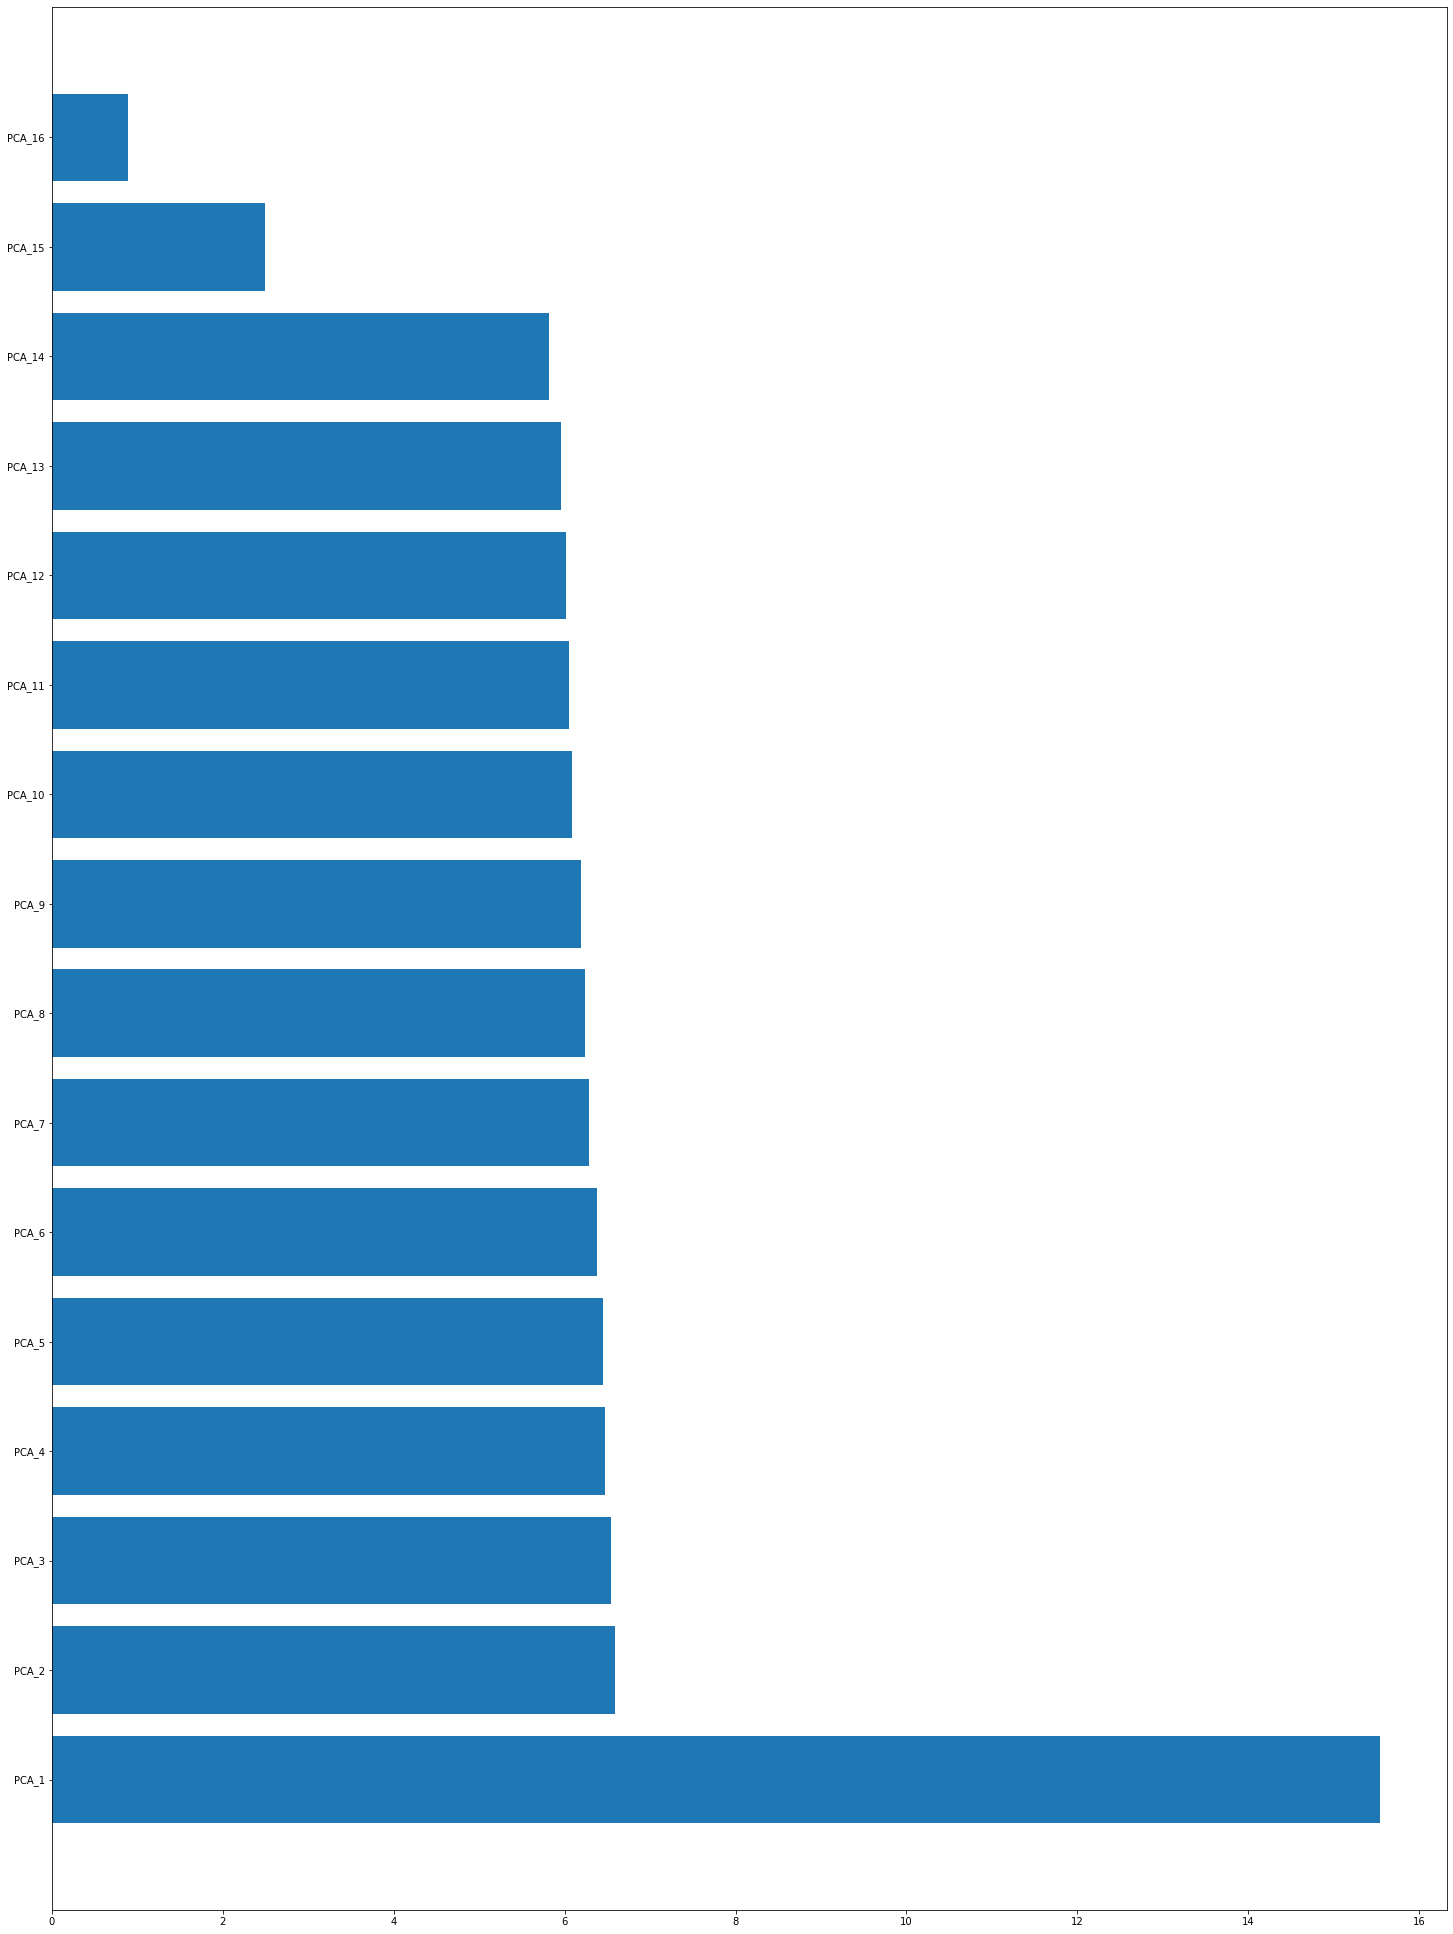

In [ ]:
plt.figure(figsize=(25,35)) 
labels = [f'PCA_{i+1}' for i in range(pca.n_components_)]
plt.barh(labels, pca.explained_variance_ratio_*100)

<BarContainer object of 16 artists>

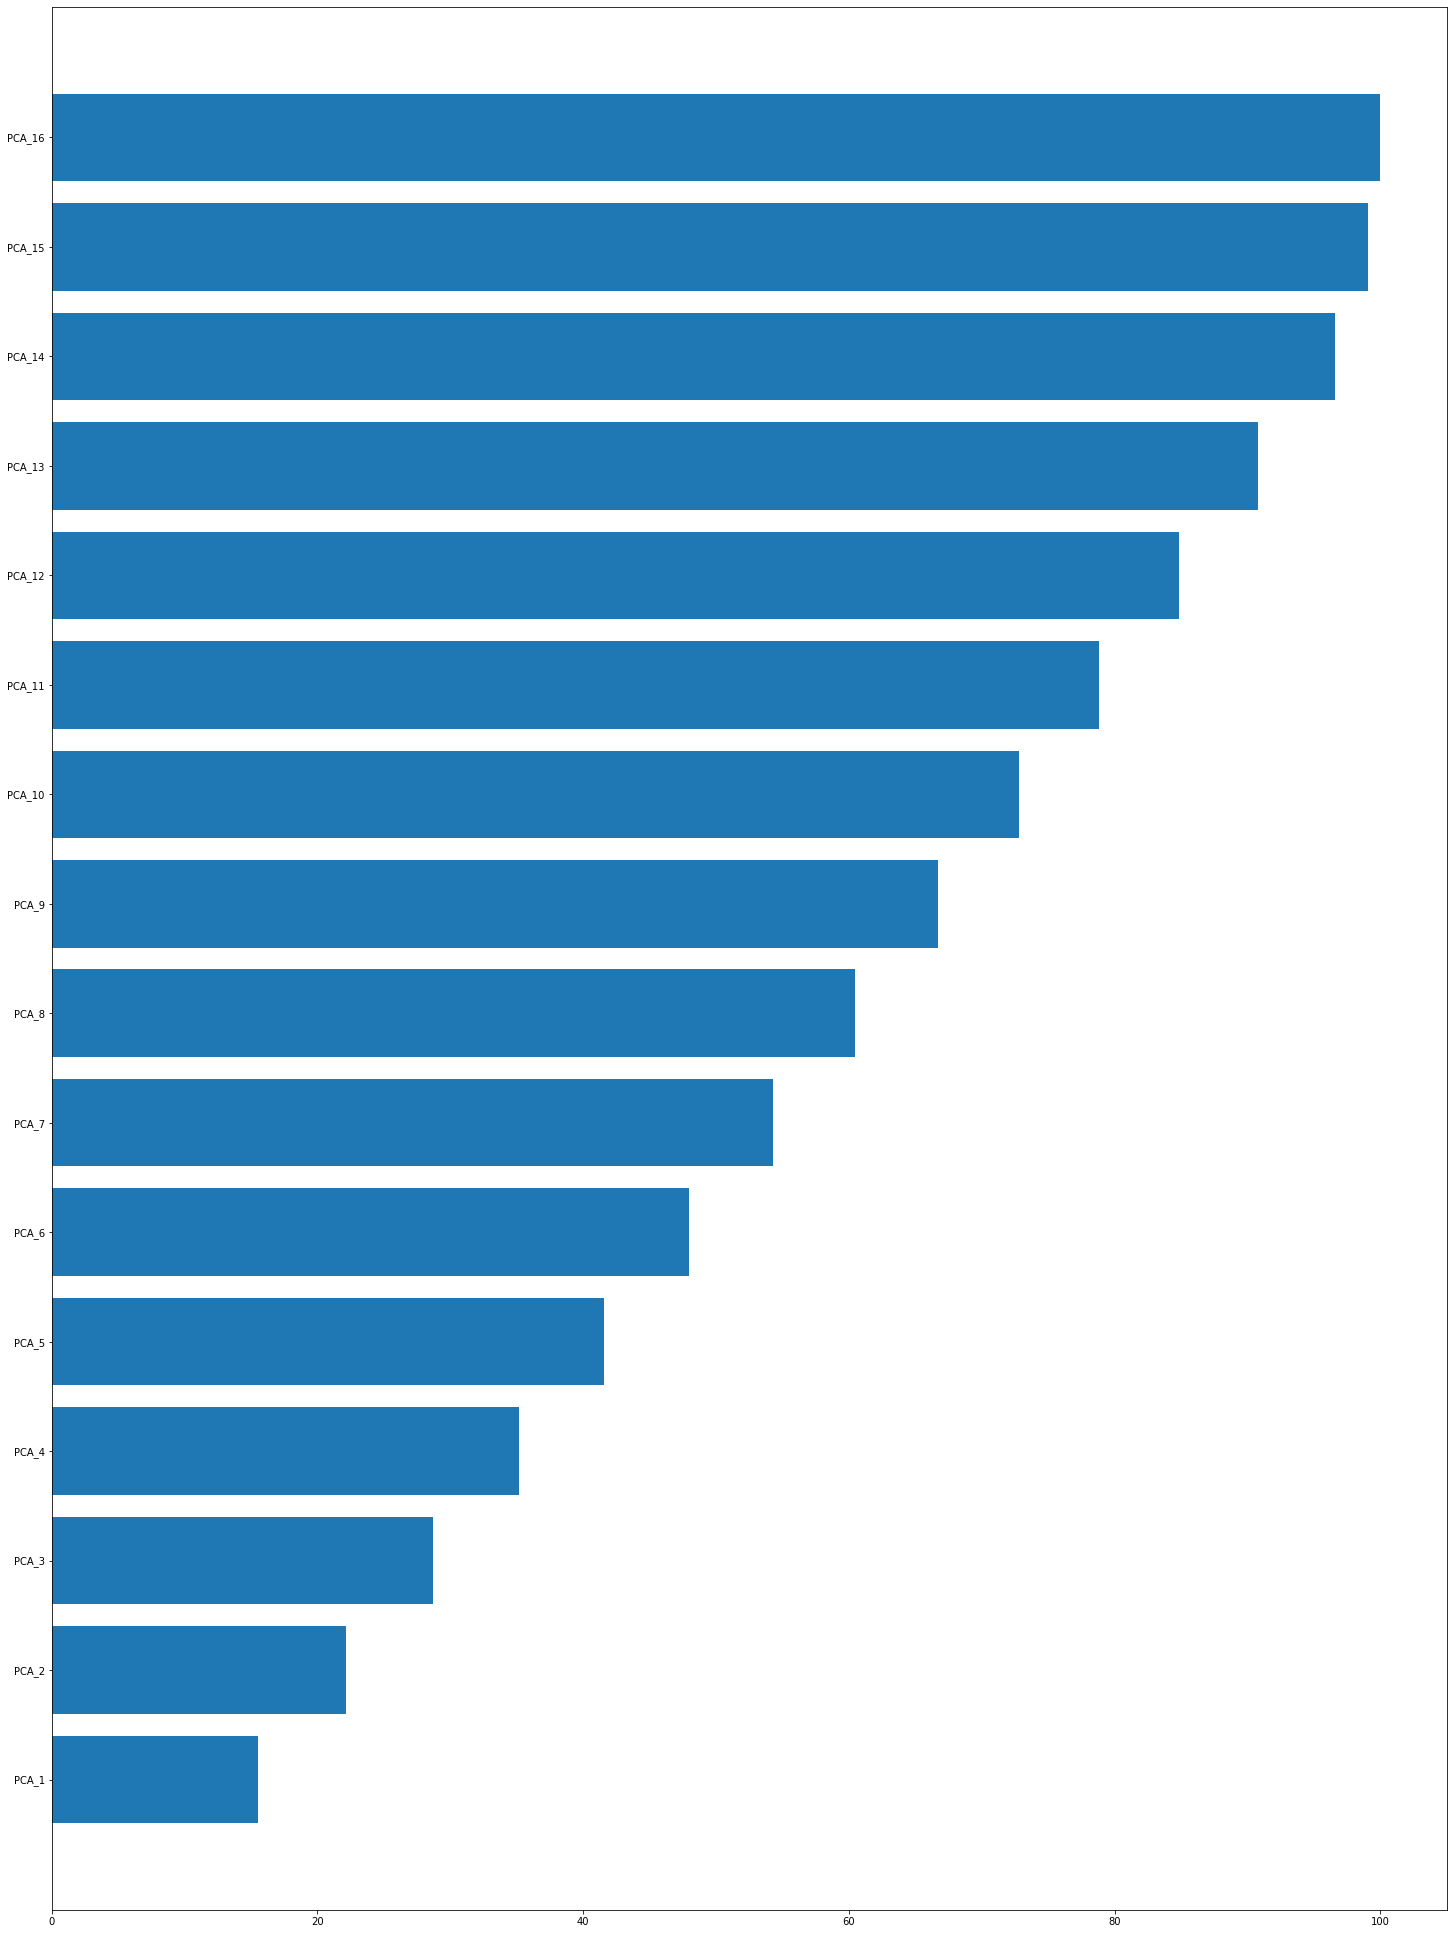

In [ ]:
plt.figure(figsize=(25,35)) 
labels = [f'PCA_{i+1}' for i in range(pca.n_components_)]
plt.barh(labels, pca.explained_variance_ratio_.cumsum()*100)

FUNÇÃO QUE IMPRIME AS MÉTRICAS

In [ ]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix


Métricas de avaliação de treino:
[[4519    0]
 [   0 4519]]


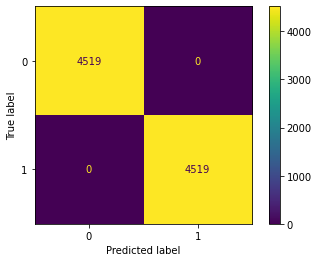

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4519
           1       1.00      1.00      1.00      4519

    accuracy                           1.00      9038
   macro avg       1.00      1.00      1.00      9038
weighted avg       1.00      1.00      1.00      9038


Métricas de avaliação de teste:
[[1128    2]
 [ 337  793]]


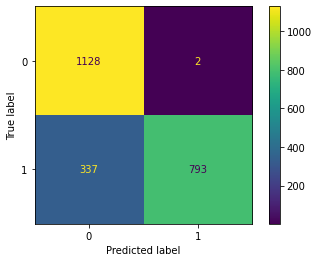

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1130
           1       1.00      0.70      0.82      1130

    accuracy                           0.85      2260
   macro avg       0.88      0.85      0.85      2260
weighted avg       0.88      0.85      0.85      2260



In [ ]:
pipe_pca = Pipeline([('RF', RandomForestClassifier(random_state=101))])
pipe_pca.fit(X_train, y_train)
metricas_classificacao(pipe_pca, X_train, X_test, y_train, y_test)


Métricas de avaliação de treino:
[[4130  389]
 [1188 3331]]


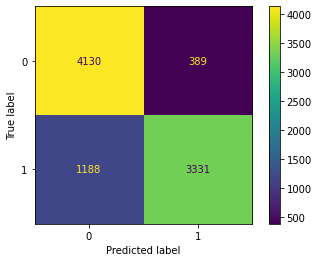

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      4519
           1       0.90      0.74      0.81      4519

    accuracy                           0.83      9038
   macro avg       0.84      0.83      0.82      9038
weighted avg       0.84      0.83      0.82      9038


Métricas de avaliação de teste:
[[1029  101]
 [ 318  812]]


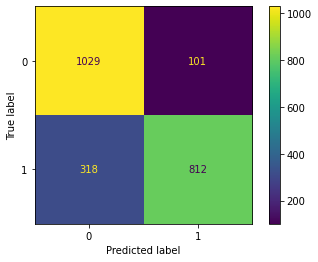

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1130
           1       0.89      0.72      0.79      1130

    accuracy                           0.81      2260
   macro avg       0.83      0.81      0.81      2260
weighted avg       0.83      0.81      0.81      2260



In [ ]:
pipe_pca = Pipeline([('RF', LogisticRegression(random_state=101))])
pipe_pca.fit(X_train, y_train)
metricas_classificacao(pipe_pca, X_train, X_test, y_train, y_test)

##REGRESSÃO LOGISTICA

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logit.intercept_

array([-5.29284089e-09])

In [ ]:
logit.coef_

array([[ 3.63448059e-04,  1.91717578e-06, -1.47336953e-07,
        -4.29753048e-08, -1.71461718e-05, -1.64744652e-05,
        -1.57140844e-05, -6.96750929e-06, -2.15239625e-05,
        -1.37512460e-05, -2.55089897e-05, -1.12252553e-05,
        -1.32039366e-05, -1.90923621e-05, -1.47867152e-05,
        -1.63098537e-07]])

In [ ]:
y_pred = logit.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test.value_counts()

0    1130
1    1130
Name: failure, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


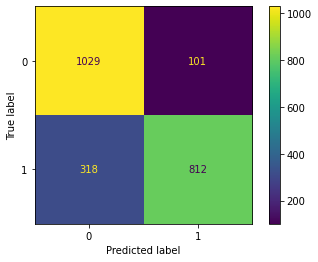

In [ ]:
plot_confusion_matrix(logit, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1130
           1       0.89      0.72      0.79      1130

    accuracy                           0.81      2260
   macro avg       0.83      0.81      0.81      2260
weighted avg       0.83      0.81      0.81      2260



PREDICT PROBA

In [ ]:
from sklearn import metrics
predict_proba = logit.predict_proba(X_test)
tpr, tpr, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
print (thresholds)

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict_proba[:,1]>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

[1.99948825 0.99948825 0.71918669 0.71876459 0.66434844 0.66285455
 0.65991087 0.65884098 0.6582989  0.65348669 0.65106435 0.64643309
 0.64004873 0.63045873 0.62925707 0.61875659 0.61068672 0.60592274
 0.60466396 0.60289918 0.59698891 0.59552246 0.59383878 0.59120909
 0.58878933 0.58796694 0.58763771 0.58720305 0.58673481 0.58266822
 0.58221498 0.57829691 0.57505056 0.57254191 0.57152017 0.57115685
 0.56921826 0.56422813 0.56243155 0.56014338 0.55802575 0.55800034
 0.55653197 0.55473886 0.55307625 0.55119734 0.5509762  0.54801747
 0.54755905 0.54586201 0.54532146 0.54506078 0.54480815 0.54466128
 0.54441338 0.54409728 0.54200319 0.54047867 0.53845607 0.52890106
 0.52748864 0.51191461 0.51153514 0.50816021 0.50815915 0.50329031
 0.50324593 0.50193735 0.5018083  0.50090001 0.50077404 0.4936313
 0.49280911 0.4908318  0.49051298 0.48782659 0.4871394  0.48536319
 0.48515077 0.48334748 0.48313803 0.48217827 0.48164223 0.48128832
 0.48072125 0.48011267 0.47949281 0.47879522 0.47869981 0.47734

In [ ]:
y_proba_0 = predict_proba[:, 0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = predict_proba[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = logit.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

In [ ]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

0    1597
1     663
dtype: int64

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # Obtendo as probabilidades de nossas previsões
# y_scores = LogisticRegression.predict_proba(X_test)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# metrics.roc_auc_score

In [ ]:
roc_auc_score(y_test, y_proba_1)

0.8450834051217793

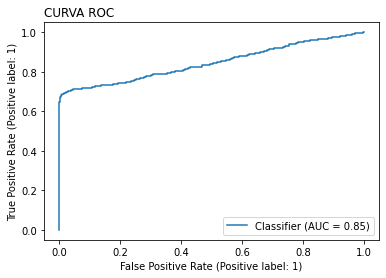

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_proba_1)

plt.title('CURVA ROC', loc='left')

# plt.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

x = np.linspace(0, 1, 100)
y = X

# plt.plot(x, y, ls=':', color='blue')
plt.show()

##PREDIÇÕES LOGIT

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/test.csv')
df_test.head(1)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.07,13.772,13.659,16.825,13.742,17.71,634.612


VERIFICANDO A PRESENÇA DE DADOS NULOS

In [ ]:
df_test.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

PREENCHENDO OS VALORS NANs USANDO "SAMPLEIMPUTER" DO SKLEARN

In [ ]:
most_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_imputer

SimpleImputer(strategy='median')

PREENCHENDO AS COLUNAS COM A MEDIANA

In [ ]:
df_test.loading = most_imputer.fit_transform(df_test[['loading']])
# df_test.measurement_3 = most_imputer.fit_transform(df_test[['measurement_3']])
df_test.measurement_4 = most_imputer.fit_transform(df_test[['measurement_4']])
df_test.measurement_5 = most_imputer.fit_transform(df_test[['measurement_5']])
df_test.measurement_6 = most_imputer.fit_transform(df_test[['measurement_6']])
# df_test.measurement_7 = most_imputer.fit_transform(df_test[['measurement_7']])
df_test.measurement_8 = most_imputer.fit_transform(df_test[['measurement_8']])
df_test.measurement_9 = most_imputer.fit_transform(df_test[['measurement_9']])
df_test.measurement_10 = most_imputer.fit_transform(df_test[['measurement_10']])
# df_test.measurement_11 = most_imputer.fit_transform(df_test[['measurement_11']])
df_test.measurement_12 = most_imputer.fit_transform(df_test[['measurement_12']])
df_test.measurement_13 = most_imputer.fit_transform(df_test[['measurement_13']])
df_test.measurement_14 = most_imputer.fit_transform(df_test[['measurement_14']])
df_test.measurement_15 = most_imputer.fit_transform(df_test[['measurement_15']])
df_test.measurement_16 = most_imputer.fit_transform(df_test[['measurement_16']])
df_test.measurement_17 = most_imputer.fit_transform(df_test[['measurement_17']])

TRANSFORMANDO VALORES STRINGS DA COLUINA ['PRODUCT_CODE'] EM VALORES NUMÉRICOS

In [ ]:
df_test['product_code'].value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

In [ ]:
df_test = df_test.replace(to_replace = 'F', value = 6)
df_test = df_test.replace(to_replace = 'G', value = 7)
df_test = df_test.replace(to_replace = 'H', value = 8)
df_test = df_test.replace(to_replace = 'I', value = 9)



TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_0'] EM VALORES NUMÉRICOS

In [ ]:
df_test['attribute_0'].value_counts()

material_5    10529
material_7    10246
Name: attribute_0, dtype: int64

In [ ]:
df_test = df_test.replace(to_replace = 'material_5', value = 5)
df_test = df_test.replace(to_replace = 'material_7', value = 7)

:TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_1'] EM VALORES NUMÉRICOS

In [ ]:
df_test['attribute_1'].value_counts()

material_6    10529
5              5228
7              5018
Name: attribute_1, dtype: int64

In [ ]:
df_test = df_test.replace(to_replace = 'material_6', value = 5)
df_test.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

DROPANDO AS COLUNAS

In [ ]:
df_test = df_test.drop(columns='measurement_0')
df_test = df_test.drop(columns='measurement_1')
df_test = df_test.drop(columns='measurement_2')


# df = df.drop(columns='measurement_4')
# df = df.drop(columns='measurement_5')
# df = df.drop(columns='measurement_6')
# df = df.drop(columns='measurement_8')
# df = df.drop(columns='measurement_9')
# df = df.drop(columns='measurement_10')
# df = df.drop(columns='measurement_12')
# df = df.drop(columns='measurement_13')
# df = df.drop(columns='measurement_14')
# df = df.drop(columns='measurement_15')
# df = df.drop(columns='measurement_16')
# df = df.drop(columns='measurement_17')

In [ ]:
df_test = df_test.drop(columns='measurement_3')
df_test = df_test.drop(columns='measurement_7')
df_test = df_test.drop(columns='measurement_11')
df_test = df_test.drop(columns='product_code')
df_test = df_test.drop(columns='attribute_0')
df_test = df_test.drop(columns='attribute_1')

In [ ]:
# X_from_CSV = df_test.iloc[:, 1:20].values

X_test_new = ss.transform(df_test)
predictions = logit.predict(X_test_new)
# predictions = (predictions > 0.52)

df = pd.DataFrame(
    {'id': df_test['id'], 
     'failure': predictions
     })

df.to_csv('result_RL2.csv', index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


##ARVORE DE DECISÃO

In [ ]:
df

In [ ]:
df_model = df.select_dtypes(include=np.number)

In [ ]:
# sns.pairplot(data=df_model, hue="failure")

SEPARANDO OS DADOS EM TRAIN E TEST

In [ ]:
X = df.drop(columns='failure')
y = df['failure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

PADRONIZE RECURSOS REMOVENDO A MÉDIA E DIMENSIONANDO PARA A VARIAÇÃO DA UNIDADE.

In [ ]:
ss = StandardScaler().fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_train_ss

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# ============================================

dt = DecisionTreeClassifier().fit(X_train, y_train)

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=300)

# plot_tree(dt)

# fig.savefig("arvore1.png")

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# plot_tree(dt, feature_names=X_train.columns)

# fig.savefig("arvore1.png")

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

# plot_tree(dt, feature_names=X_train.columns, max_depth=3)

In [ ]:
dt.get_depth()

In [ ]:
dt.get_n_leaves()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_dt.fit(X_train, y_train)

# ============================================

In [ ]:
grid_dt.best_params_

In [ ]:
grid_dt.best_params_

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
grid_dt

In [ ]:
grid_dt.best_estimator_

In [ ]:
grid_dt.best_estimator_["dt"]

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)

# # note que temos que passar o objeto da árvore, que está dentro do objeto do grid search!
# plot_tree(grid_dt.best_estimator_["dt"], feature_names=X_train.columns)

# fig.savefig("arvore_regularizada.png")1

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import scipy

# distirbuição uniforme sobre o espaço amostral (0, 1) pro hiperparametro dt__min_impurity_decrease
scipy.stats.uniform(0, 1)

In [ ]:
import scipy

# distirbuição uniforme sobre o espaço amostral (0, 1) pro hiperparametro dt__min_impurity_decrease
scipy.stats.uniform(0, 1)

In [ ]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 1)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
grid_dt_random.best_params_

In [ ]:
grid_dt_random.best_estimator_["dt"]

In [ ]:
grid_dt_random.best_estimator_["dt"].get_depth()

In [ ]:
grid_dt_random.best_estimator_["dt"].get_n_leaves()

In [ ]:
results = pd.DataFrame(grid_dt_random.cv_results_)

In [ ]:
results["param_dt__min_impurity_decrease"].astype(float).describe()

In [ ]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.05)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

In [ ]:
pd.DataFrame(grid_dt_random.cv_results_)

In [ ]:
grid_dt_random.best_params_

In [ ]:
grid_dt_random.best_score_

In [ ]:
grid_dt_random.best_estimator_["dt"].get_depth()

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.01)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=500,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

In [ ]:
grid_dt_random.best_params_

In [ ]:
pd.DataFrame(grid_dt_random.cv_results_).sort_values("rank_test_score")

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
grid_dt_random.best_estimator_

In [ ]:
from joblib import dump, load

dump(grid_dt_random, 'grid_tree.joblib')

In [ ]:
pipe_lida_tree = load('grid_tree.joblib') 

In [ ]:
pipe_lida_tree

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_lida_tree.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_lida_tree.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

PREDICT PROBA

In [ ]:
from sklearn import metrics
predict_proba = grid_dt_random.predict_proba(X_test)
tpr, tpr, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
print (thresholds)

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict_proba[:,1]>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

In [ ]:
y_proba_0 = predict_proba[:, 0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = predict_proba[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = grid_dt_random.predict_proba(X_test)[:, 1] #pipe_lida_tree


precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

In [ ]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # Obtendo as probabilidades de nossas previsões
# y_scores = LogisticRegression.predict_proba(X_test)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# metrics.roc_auc_score

In [ ]:
roc_auc_score(y_test, y_proba_1)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_proba_1)

plt.title('CURVA ROC', loc='left')

# plt.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

x = np.linspace(0, 1, 100)
y = X

# plt.plot(x, y, ls=':', color='blue')
plt.show()

PREDICTIONS

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/test.csv')
df_test.head(1)

VERIFICANDO A PRESENÇA DE DADOS NULOS

In [ ]:
df_test.isnull().sum()

PREENCHENDO OS VALORS NANs USANDO "SAMPLEIMPUTER" DO SKLEARN

In [ ]:
most_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_imputer

PREENCHENDO AS COLUNAS COM A MEDIANA

In [ ]:
df_test.loading = most_imputer.fit_transform(df_test[['loading']])
# df_test.measurement_3 = most_imputer.fit_transform(df_test[['measurement_3']])
df_test.measurement_4 = most_imputer.fit_transform(df_test[['measurement_4']])
df_test.measurement_5 = most_imputer.fit_transform(df_test[['measurement_5']])
df_test.measurement_6 = most_imputer.fit_transform(df_test[['measurement_6']])
# df_test.measurement_7 = most_imputer.fit_transform(df_test[['measurement_7']])
df_test.measurement_8 = most_imputer.fit_transform(df_test[['measurement_8']])
df_test.measurement_9 = most_imputer.fit_transform(df_test[['measurement_9']])
df_test.measurement_10 = most_imputer.fit_transform(df_test[['measurement_10']])
# df_test.measurement_11 = most_imputer.fit_transform(df_test[['measurement_11']])
df_test.measurement_12 = most_imputer.fit_transform(df_test[['measurement_12']])
df_test.measurement_13 = most_imputer.fit_transform(df_test[['measurement_13']])
df_test.measurement_14 = most_imputer.fit_transform(df_test[['measurement_14']])
df_test.measurement_15 = most_imputer.fit_transform(df_test[['measurement_15']])
df_test.measurement_16 = most_imputer.fit_transform(df_test[['measurement_16']])
df_test.measurement_17 = most_imputer.fit_transform(df_test[['measurement_17']])

TRANSFORMANDO VALORES STRINGS DA COLUINA ['PRODUCT_CODE'] EM VALORES NUMÉRICOS

In [ ]:
df_test['product_code'].value_counts()

In [ ]:
df_test = df_test.replace(to_replace = 'F', value = 6)
df_test = df_test.replace(to_replace = 'G', value = 7)
df_test = df_test.replace(to_replace = 'H', value = 8)
df_test = df_test.replace(to_replace = 'I', value = 9)



TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_0'] EM VALORES NUMÉRICOS

In [ ]:
df_test['attribute_0'].value_counts()

In [ ]:
df_test = df_test.replace(to_replace = 'material_5', value = 5)
df_test = df_test.replace(to_replace = 'material_7', value = 7)

:TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_1'] EM VALORES NUMÉRICOS

In [ ]:
df_test['attribute_1'].value_counts()

In [ ]:
df_test = df_test.replace(to_replace = 'material_6', value = 5)
df_test.columns

DROPANDO AS COLUNAS

In [ ]:
df_test = df_test.drop(columns='measurement_0')
df_test = df_test.drop(columns='measurement_1')
df_test = df_test.drop(columns='measurement_2')


# df = df.drop(columns='measurement_4')
# df = df.drop(columns='measurement_5')
# df = df.drop(columns='measurement_6')
# df = df.drop(columns='measurement_8')
# df = df.drop(columns='measurement_9')
# df = df.drop(columns='measurement_10')
# df = df.drop(columns='measurement_12')
# df = df.drop(columns='measurement_13')
# df = df.drop(columns='measurement_14')
# df = df.drop(columns='measurement_15')
# df = df.drop(columns='measurement_16')
# df = df.drop(columns='measurement_17')

In [ ]:
df_test = df_test.drop(columns='measurement_3')
df_test = df_test.drop(columns='measurement_7')
df_test = df_test.drop(columns='measurement_11')

In [ ]:
X_train

**PREDICTIONS**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/train.csv')
df

PREENCHENDO OS VALORS NANs USANDO "SAMPLEIMPUTER" DO SKLEARN

In [ ]:
most_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_imputer

PREENCHENDO AS COLUNAS COM A MEDIANA

In [ ]:
df.loading = most_imputer.fit_transform(df[['loading']])
df.measurement_3 = most_imputer.fit_transform(df[['measurement_3']])
df.measurement_4 = most_imputer.fit_transform(df[['measurement_4']])
df.measurement_5 = most_imputer.fit_transform(df[['measurement_5']])
df.measurement_6 = most_imputer.fit_transform(df[['measurement_6']])
df.measurement_7 = most_imputer.fit_transform(df[['measurement_7']])
df.measurement_8 = most_imputer.fit_transform(df[['measurement_8']])
df.measurement_9 = most_imputer.fit_transform(df[['measurement_9']])
df.measurement_10 = most_imputer.fit_transform(df[['measurement_10']])
df.measurement_11 = most_imputer.fit_transform(df[['measurement_11']])
df.measurement_12 = most_imputer.fit_transform(df[['measurement_12']])
df.measurement_13 = most_imputer.fit_transform(df[['measurement_13']])
df.measurement_14 = most_imputer.fit_transform(df[['measurement_14']])
df.measurement_15 = most_imputer.fit_transform(df[['measurement_15']])
df.measurement_16 = most_imputer.fit_transform(df[['measurement_16']])
df.measurement_17 = most_imputer.fit_transform(df[['measurement_17']])

VERIFICANDO SE TODAS AS FEATURES COM DADOS NANs FORAM PREENCHIDAS COM A MEDIANA

In [ ]:
df.isnull().sum()

AVALIANDO OS PRODUTOS

QTDE DE VALORES POR PRODUTOS

In [ ]:
df['product_code'].value_counts()

QTDE DE VALORES ÚNICOS

In [ ]:
df['product_code'].unique()

In [ ]:
df = df.drop(columns='measurement_0')
df = df.drop(columns='measurement_1')
df = df.drop(columns='measurement_2')


# df = df.drop(columns='measurement_4')
# df = df.drop(columns='measurement_5')
# df = df.drop(columns='measurement_6')
# df = df.drop(columns='measurement_8')
# df = df.drop(columns='measurement_9')
# df = df.drop(columns='measurement_10')
# df = df.drop(columns='measurement_12')
# df = df.drop(columns='measurement_13')
# df = df.drop(columns='measurement_14')
# df = df.drop(columns='measurement_15')
# df = df.drop(columns='measurement_16')
# df = df.drop(columns='measurement_17')

In [ ]:
df = df.drop(columns='measurement_3')
df = df.drop(columns='measurement_7')
df = df.drop(columns='measurement_11')

TRANSFORMANDO VALORES STRINGS DA COLUINA ['PRODUCT_CODE'] EM VALORES NUMÉRICOS

In [ ]:
df['product_code'].value_counts()

In [ ]:
df = df.replace(to_replace = 'A', value = 0)
df = df.replace(to_replace = 'B', value = 1)
df = df.replace(to_replace = 'C', value = 2)
df = df.replace(to_replace = 'D', value = 3)
df = df.replace(to_replace = 'E', value = 4)


TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_0'] EM VALORES NUMÉRICOS

In [ ]:
df['attribute_0'].value_counts()

In [ ]:
df = df.replace(to_replace = 'material_5', value = 5)
df = df.replace(to_replace = 'material_7', value = 7)

TRANSFORMANDO VALORES STRINGS DA COLUINA ['attribute_1'] EM VALORES NUMÉRICOS

In [ ]:
df['attribute_1'].value_counts()

In [ ]:
df = df.replace(to_replace = 'material_6', value = 6)
df = df.replace(to_replace = 'material_8', value = 8)

In [ ]:
# df = df.drop(columns='id')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
X = df.drop(columns='failure')
y = df['failure']

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
ss = StandardScaler().fit(X_train)
# X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
# X_train_ss

In [ ]:
# X_from_CSV = df_test.iloc[:, 1:20].values

X_test_new = ss.transform(df_test)
predictions = grid_dt_random.predict(X_test_new)
# predictions = (predictions > 0.52)

df = pd.DataFrame(
    {'id': df_test['id'], 
     'failure': predictions
     })

df.to_csv('grid_dt_random.csv', index=False)

##RANDOM FOREST

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# df = pd.read_csv("../datasets/german_credit_data.csv", index_col=0)

X = df.drop(columns="failure")
y = df["failure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==========================================================

pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                              ("onehot", OneHotEncoder())])

features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()


pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat", pipe_features_cat, features_cat)])

# pipeline final
pipe_rf = Pipeline([("pre_processador", pre_processador),
                    ("rf", RandomForestClassifier(random_state=42))])


pipe_rf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [ ]:
def metricas_classificacao(estimator):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    

In [ ]:
def pipe_pre_process_german():
    
    X = df.drop(columns="failure")
    y = df["failure"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  ("onehot", OneHotEncoder())])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return pre_processador

In [ ]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_rf = Pipeline([("pre_processador", pre_processador),
                    # agora temos árvores regularizadas com max_depth=5
                     ("rf", RandomForestClassifier(n_estimators=5000,
                                                   max_depth=5,
                                                   random_state=42,
                                                   n_jobs=-1))])


pipe_rf.fit(X_train, y_train)

In [ ]:
metricas_classificacao(pipe_rf)

PREDICT PROBA

In [ ]:
from sklearn import metrics
predict_proba = pipe_rf.predict_proba(X_test)
tpr, tpr, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
print (thresholds)

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict_proba[:,1]>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

In [ ]:
y_proba_0 = predict_proba[:, 0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = predict_proba[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = pipe_rf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

In [ ]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # Obtendo as probabilidades de nossas previsões
# y_scores = LogisticRegression.predict_proba(X_test)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# metrics.roc_auc_score

In [ ]:
roc_auc_score(y_test, y_proba_1)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_proba_1)

plt.title('CURVA ROC', loc='left')

# plt.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

x = np.linspace(0, 1, 100)
y = X

# plt.plot(x, y, ls=':', color='blue')
plt.show()

In [ ]:
# X_from_CSV = df_test.iloc[:, 1:20].values

X_test_new = ss.transform(df_test)
predictions = pipe_rf.predict(X_test_new)
# predictions = (predictions > 0.52)

df = pd.DataFrame(
    {'id': df_test['id'], 
     'failure': predictions
     })

df.to_csv('random_forest__.csv', index=False)

##ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(random_state=42))])


pipe_ab.fit(X_train, y_train)

In [ ]:
metricas_classificacao(pipe_ab)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pre_processador = pipe_pre_process_german()

basal = DecisionTreeClassifier(max_depth=1)

# pipeline final
pipe_ab = Pipeline([("pre_processador", pre_processador),
                    ("ab", AdaBoostClassifier(base_estimator=basal,
                                              random_state=42))])


pipe_ab.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_ab)

PREDICT PROBA

In [ ]:
from sklearn import metrics
predict_proba = pipe_ab.predict_proba(X_test)
tpr, tpr, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
print (thresholds)

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict_proba[:,1]>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

In [ ]:
y_proba_0 = predict_proba[:, 0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = predict_proba[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = pipe_ab.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

In [ ]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # Obtendo as probabilidades de nossas previsões
# y_scores = LogisticRegression.predict_proba(X_test)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# metrics.roc_auc_score

In [ ]:
roc_auc_score(y_test, y_proba_1)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_proba_1)

plt.title('CURVA ROC', loc='left')

# plt.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

x = np.linspace(0, 1, 100)
y = X

# plt.plot(x, y, ls=':', color='blue')
plt.show()

In [ ]:
# X_from_CSV = df_test.iloc[:, 1:20].values

X_test_new = ss.transform(df_test)
predictions = pipe_lida_tree.predict(X_test_new)
# predictions = (predictions > 0.52)

df = pd.DataFrame(
    {'id': df_test['id'], 
     'failure': predictions
     })

df.to_csv('adaboost.csv', index=False)

##XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_xgb = Pipeline([("pre_processador", pre_processador),
                     ("xgb", XGBClassifier(eval_metric='logloss', random_state=42))])


pipe_xgb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_xgb)

In [ ]:
pre_processador = pipe_pre_process_german()

# pipeline final
pipe_xgb = Pipeline([("pre_processador", pre_processador),
                     ("xgb", XGBClassifier(reg_alpha=10, eval_metric='logloss', random_state=42))])


pipe_xgb.fit(X_train, y_train)

##################################

metricas_classificacao(pipe_xgb)

PREDICT PROBA

In [ ]:
from sklearn import metrics
predict_proba = pipe_xgb.predict_proba(X_test)
tpr, tpr, thresholds = metrics.roc_curve(y_test,predict_proba[:,1])
print (thresholds)

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predict_proba[:,1]>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))

In [ ]:
y_proba_0 = predict_proba[:, 0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = predict_proba[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = pipe_xgb.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

In [ ]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # Obtendo as probabilidades de nossas previsões
# y_scores = LogisticRegression.predict_proba(X_test)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# metrics.roc_auc_score

In [ ]:
roc_auc_score(y_test, y_proba_1)

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, precision_recall_curve

RocCurveDisplay.from_predictions(y_test, y_proba_1)

plt.title('CURVA ROC', loc='left')

# plt.plot(fpr, tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')

x = np.linspace(0, 1, 100)
y = X

# plt.plot(x, y, ls=':', color='blue')
plt.show()

In [ ]:
# X_from_CSV = df_test.iloc[:, 1:20].values

X_test_new = ss.transform(df_test)
predictions = pipe_lida_tree.predict(X_test_new)
# predictions = (predictions > 0.52)

df = pd.DataFrame(
    {'id': df_test['id'], 
     'failure': predictions
     })

df.to_csv('xgboost.csv', index=False)